In [1]:
import pandas as pd

In [8]:
df = pd.read_csv('DailyDelhiClimateTest.csv')

In [9]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [10]:
df['date'] = pd.to_datetime(df.date)

In [11]:
df.set_index('date', inplace=True)

<Axes: xlabel='date', ylabel='meantemp'>

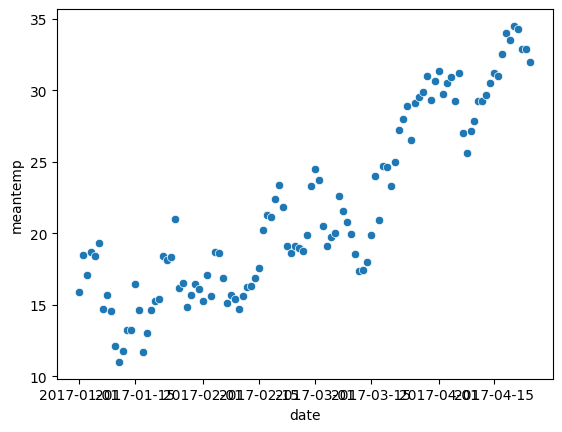

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x = "date", y = "meantemp")

In [15]:
df_train = pd.read_csv('DailyDelhiClimateTrain.csv')
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [16]:
df_train['date'] = pd.to_datetime(df_train.date)

## Monthwise meantemp graph for all years

<Axes: xlabel='month', ylabel='meantemp'>

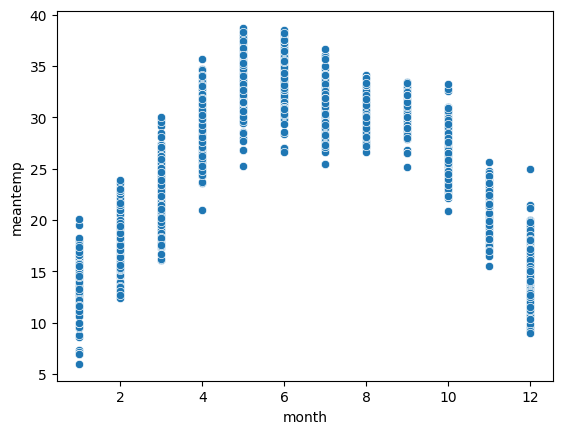

In [18]:
df_train["month"] = df_train["date"].dt.month
sns.scatterplot(data=df_train, x = "month", y = "meantemp")

## Yealy mean temperature

<Axes: xlabel='year', ylabel='meantemp'>

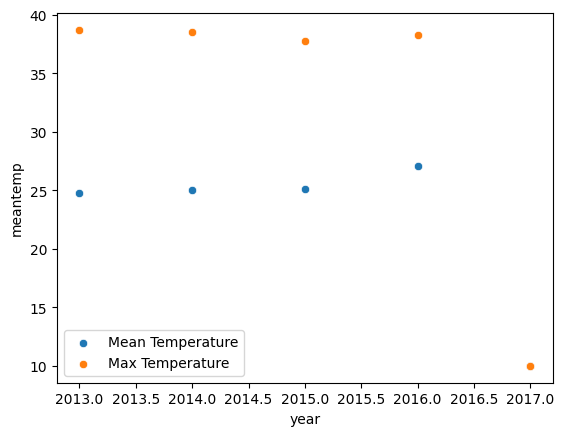

In [37]:
df_train["year"] = df_train["date"].dt.year
mean_temp_mean = df_train.groupby("year")["meantemp"].mean()
mean_temp_max = df_train.groupby("year")["meantemp"].max()
mean_temp_mean
sns.scatterplot(data=mean_temp_mean, label = "Mean Temperature")
sns.scatterplot(data=mean_temp_max, label = "Max Temperature")

maximum meantemp in which month-year

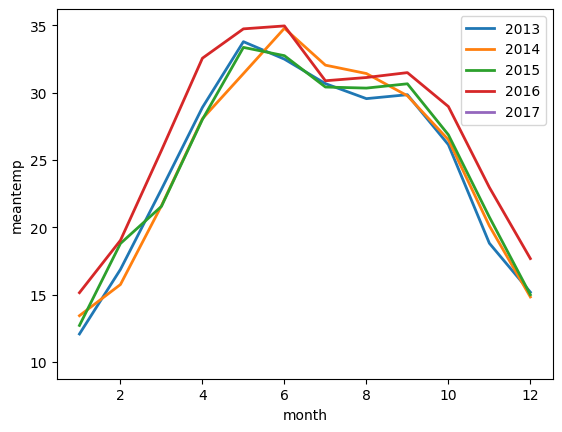

In [35]:
leg = []
for year in df_train["year"].unique():
    sns.lineplot(data=df_train[df_train["year"] == year], x = "month", y = "meantemp", errorbar = None, linewidth = 2)
    leg.append(year)

plt.legend(leg)

## Humidity trend throughout the year in 2013

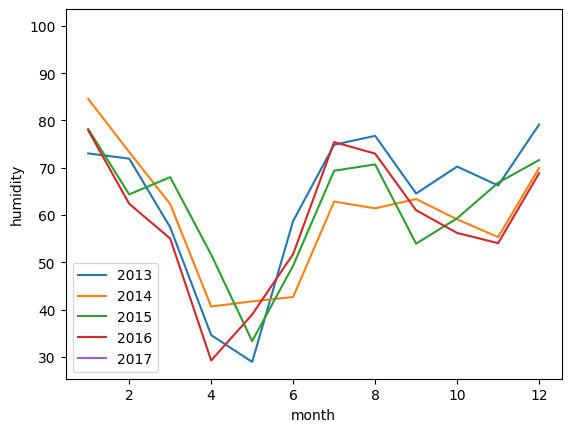

In [34]:
leg = []
for year in df_train["year"].unique():
    sns.lineplot(data=df_train[df_train["year"] == year], x = "month", y = "humidity", errorbar = None)
    leg.append(year)
plt.legend(leg)

#sns.lineplot(data=df_train[df_train["year"] == 2013], x = "month", y = "humidity")

## Bivariate analysis

<Axes: >

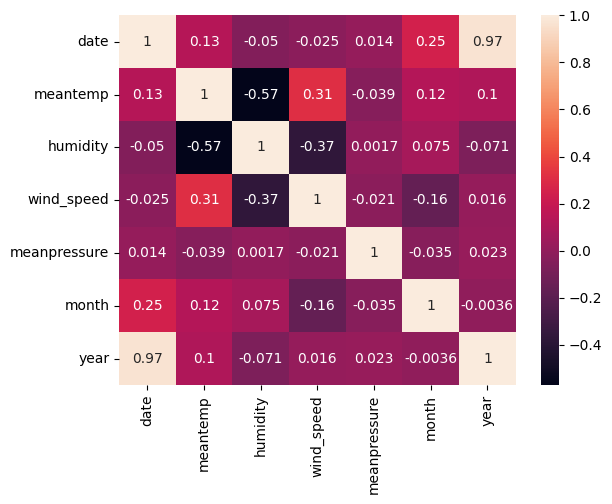

In [28]:
df_train.corr()
sns.heatmap(df_train.corr(), annot=True)

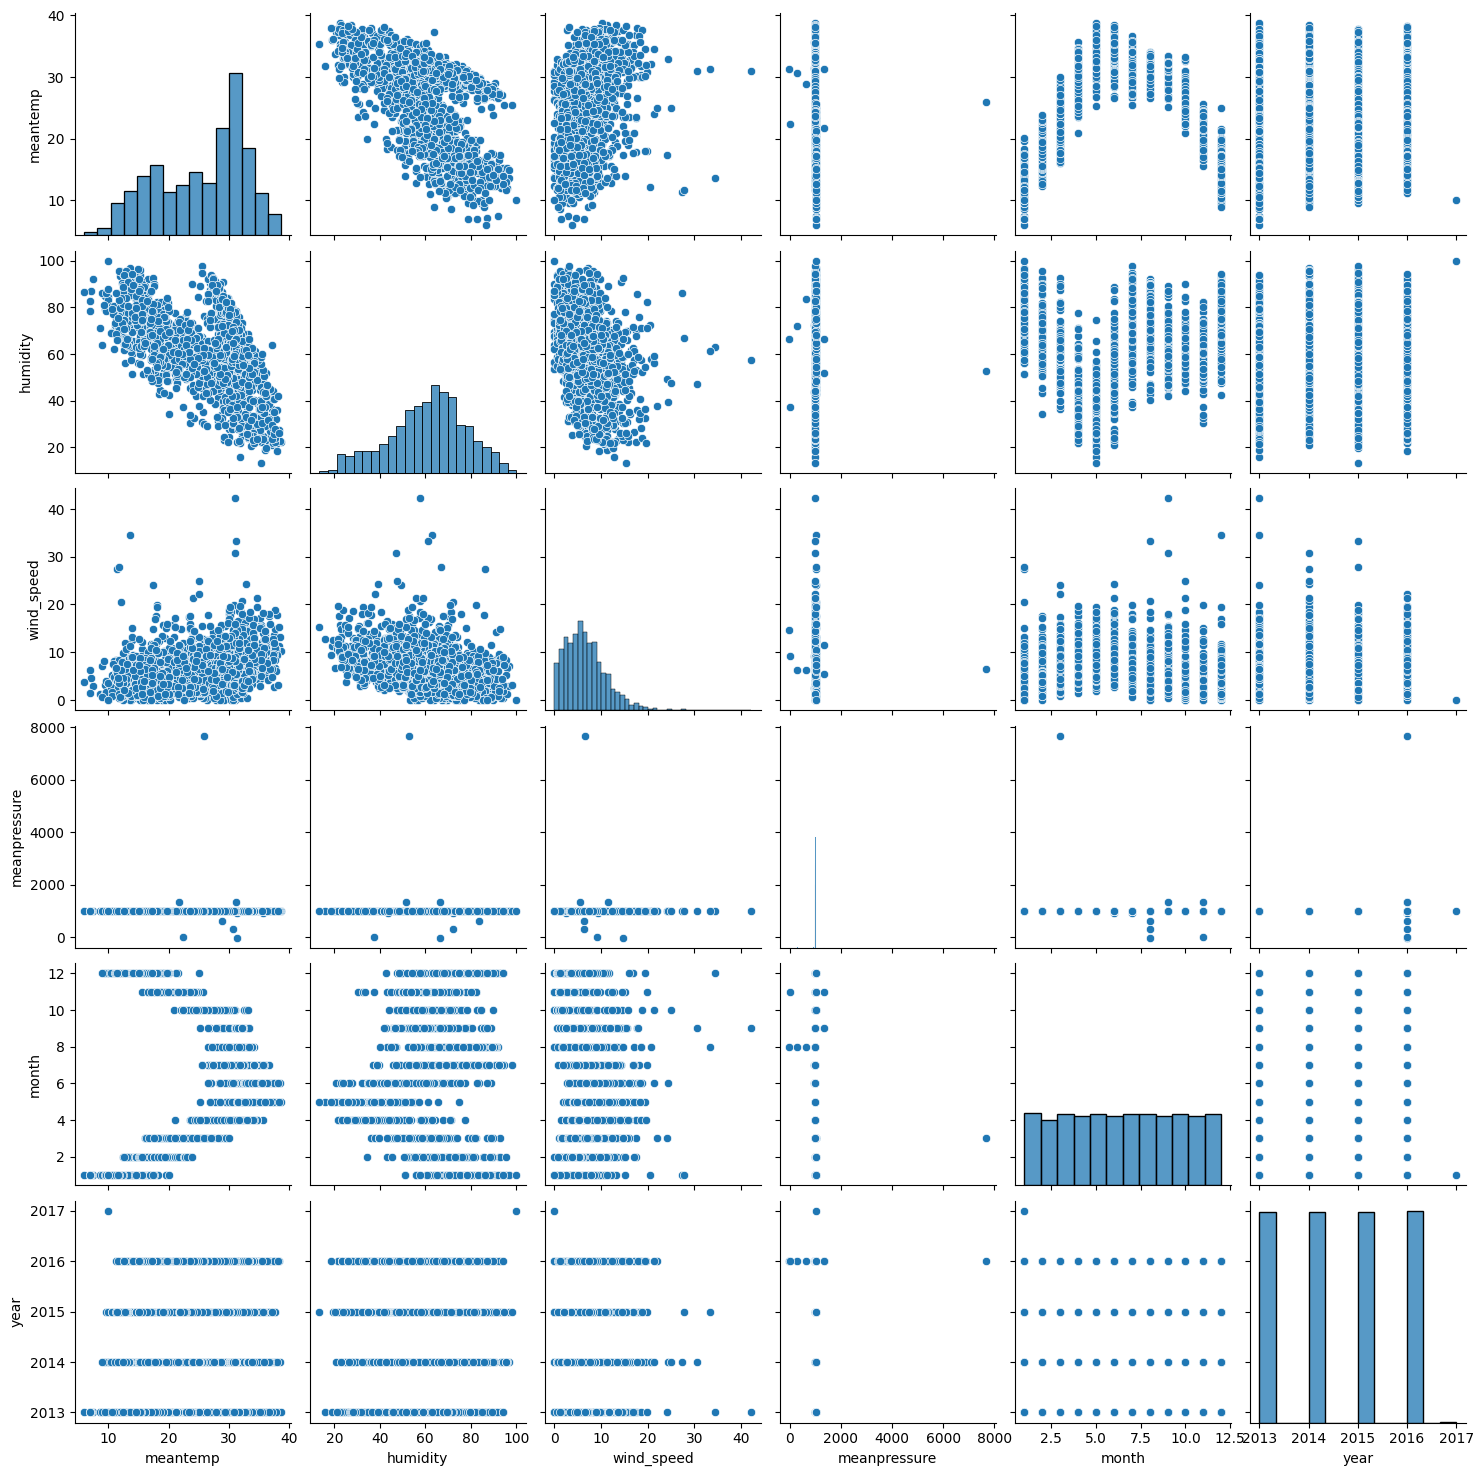

In [33]:
sns.pairplot(df_train)